# Hola Mundo


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates


import warnings
warnings.filterwarnings('ignore')

paleta = 'colorblind'
linha = 10
fonte = 15
fonteTit = 15

fundo = '#1A1D22'
vermelho = '#A81124'
amarelo = '#FED531'


## Junta tudo

In [2]:
%%script false --no-raise-error

import os
import glob

def junta_tudo(folder, colunas=None):
    
    df = pd.DataFrame()
    caminho_pasta = os.path.join(folder, '*csv')
    files = glob.glob(caminho_pasta)
    for file in files:
        dfloop = pd.read_csv(file, sep=';', usecols=colunas)
        df = pd.concat([df,dfloop])
    return df
    


df = junta_tudo('./csv_v2/')

df.to_csv('./csv_v2/infracoes_filt_new.csv', index=False, sep=';')

infracoes = open('infracoes.txt','r')

listaInfracoes = []

for l in infracoes:
    linha = l.strip()
    listaInfracoes.append(linha)

del infracoes

df = df[df.descricao_abreviada.isin(listaInfracoes)]

df.to_csv('./csv_v2/infracoes_filt.csv', index=False, sep=';')


## Graficos e análises

_Filtrando as infracões, houve redução de 63.219.086 para 47.066.206_

In [3]:
df = pd.read_csv(
    'csv_v2/infracoes_filt_new.csv', 
    sep=';', 
    #nrows=100000, 
    #engine='c',
    usecols=['dat_infracao', 'uf_infracao'],
)

df.dat_infracao = pd.to_datetime(df['dat_infracao'])

### Seasonal Plot

In [4]:
tempdf = df.uf_infracao.groupby(by=[df.dat_infracao]).count()

In [5]:
df = pd.DataFrame()
df['infracoes'] = tempdf.copy()
df.reset_index(inplace=True)

In [6]:
#df = df.sort_values('dat_infracao', ascending=True)
df['dia'] = df.dat_infracao.dt.weekday
df['Mes'] = df.dat_infracao.dt.month
df['Semana do ano'] = df.dat_infracao.dt.week
df['Ano'] = df.dat_infracao.dt.year

#### Mensal

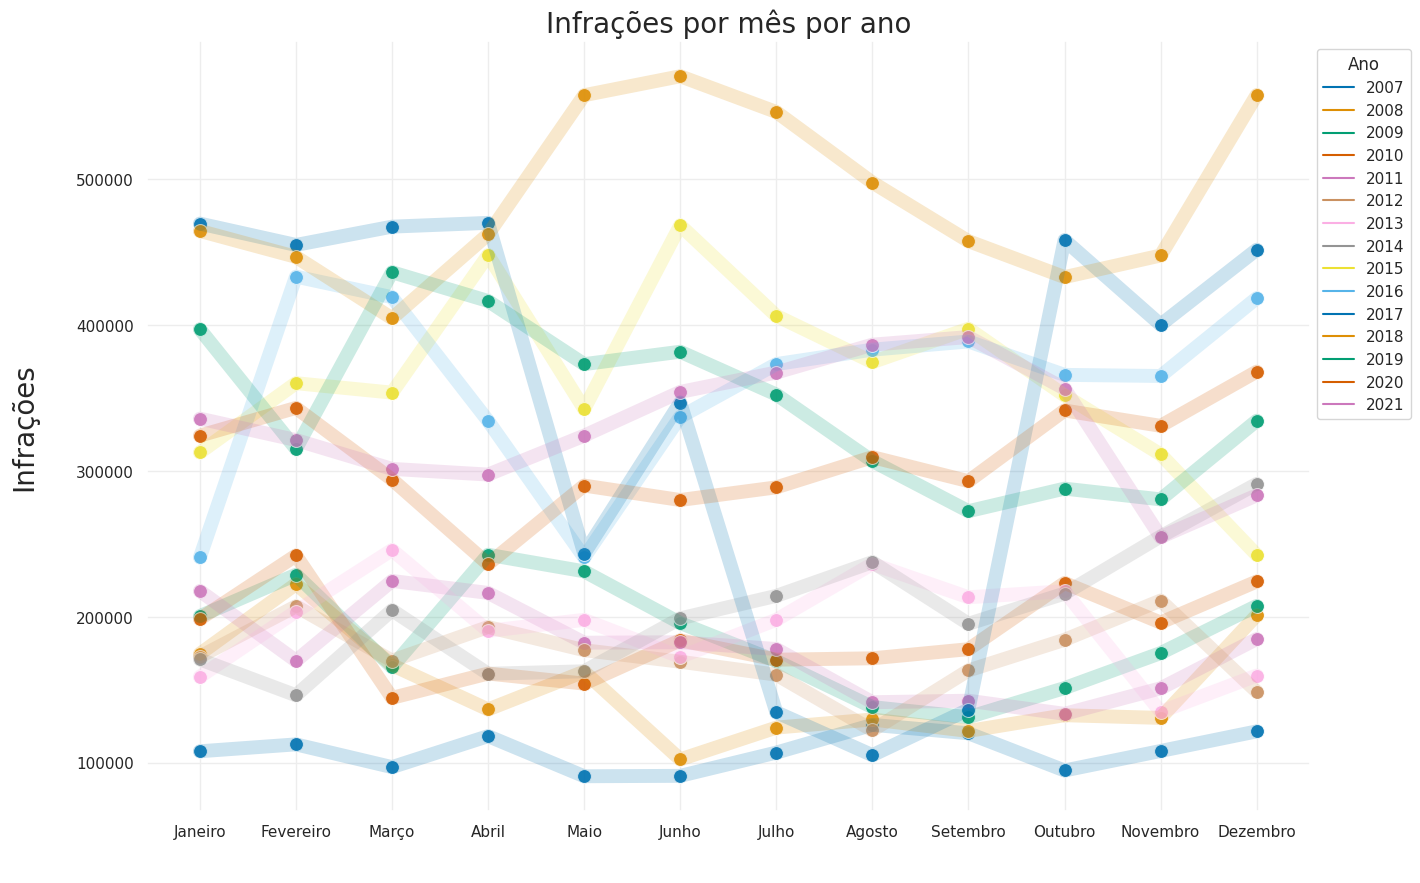

In [7]:
#%%script false --no-raise-error

df_meses = df.infracoes.groupby(by=[df.Mes, df.Ano]).sum().unstack()
df_meses.reset_index(inplace=True)


meses = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8: 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro',
    'semana': 'Semana',
    'dia' : 'Dia'
}

for k, v in meses.items():
    df_meses.loc[df_meses.Mes == k, 'Mes'] = v

df_meses.set_index('Mes', inplace= True)


sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 1)
#sns.set_style('greygrid')
sns.set(
    rc={
        'axes.facecolor':'white', 
        'grid.color':'#ededed', 
        'figure.facecolor':'white'
        }
    )

fig = sns.lineplot(
    df_meses,
    marker='o',
    legend='brief', 
    linestyle='', 
    dashes=False, 
    alpha=0.9, 
    markersize = linha, 
    linewidth=linha, 
    palette=paleta
    )

fig.set_ylabel('Infrações\n', fontsize= fonte+5)
fig.set_xlabel(' ', fontsize= fonte+5)
fig.set_title('Infrações por mês por ano', fontsize= fonteTit+5)

sns.lineplot(data=df_meses, dashes=False,  alpha=.2, legend=False, linewidth=linha, palette=paleta,ax=fig)

sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

plt.show()

del df_meses

#### Semanal

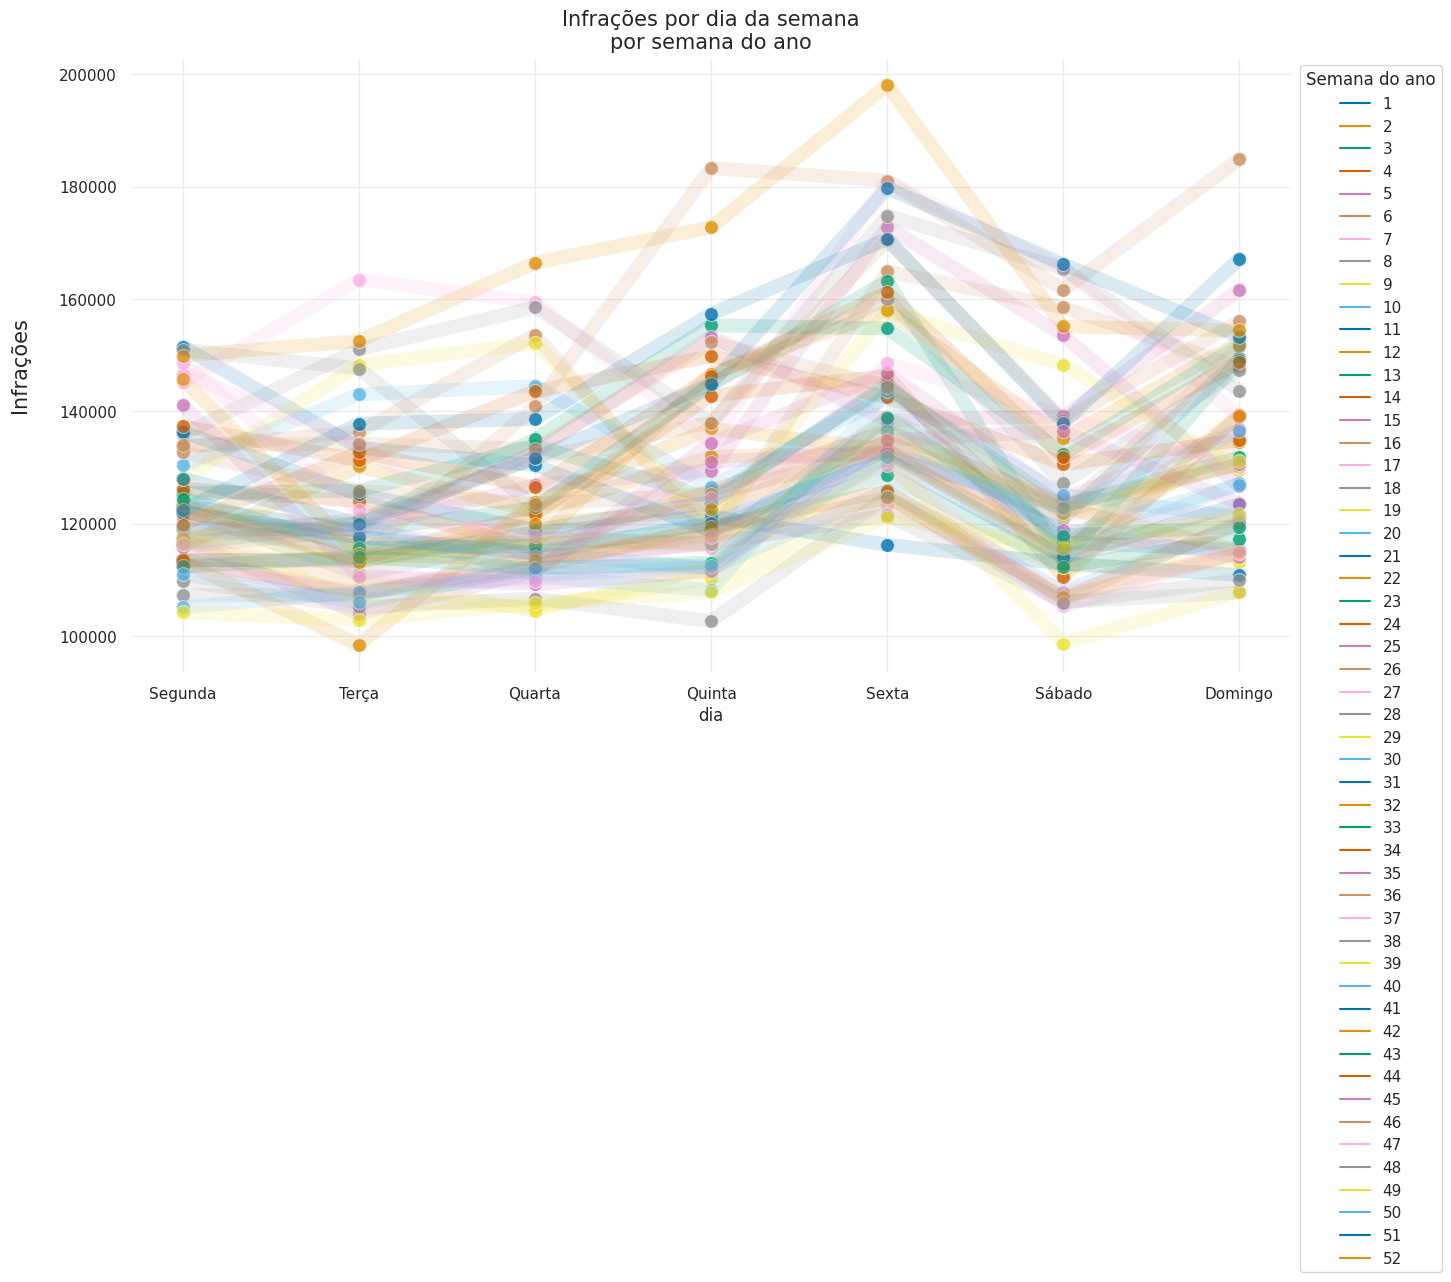

In [8]:
#%%script false --no-raise-error

df_dias = df.infracoes.groupby(by=[df.dia, df['Semana do ano']]).sum().unstack()
df_dias.reset_index(inplace = True)

dias = {
    0 : 'Segunda',
    1 : 'Terça',
    2 : 'Quarta',
    3 : 'Quinta',
    4 : 'Sexta',
    5 : 'Sábado',
    6 : 'Domingo',
    'semana': 'Semana',
    'dia' : 'Dia'
}

for k, v in dias.items():
    df_dias.loc[df_dias.dia == k, 'dia'] = v

df_dias.set_index('dia', inplace= True)


sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale = 1)
#sns.set_style('greygrid')
sns.set(rc={'axes.facecolor':'white', 'grid.color':'#ededed', 'figure.facecolor':'white'})

fig = sns.lineplot(df_dias.drop(columns=[53]),marker='o', linestyle='', palette=paleta, dashes=False, alpha=.8, markersize = linha, linewidth=linha)
#fig.set_xlabel('\n\nDias da semana', fontsize = fonte)
fig.set_ylabel('Infrações\n', fontsize = fonte)
fig.set_title('Infrações por dia da semana\npor semana do ano', fontsize = fonteTit)

sns.lineplot(data=df_dias.drop(columns=[53]), dashes=False,  alpha=.15, legend=False,  palette=paleta, linewidth=linha, ax=fig)
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.show()

del df_dias

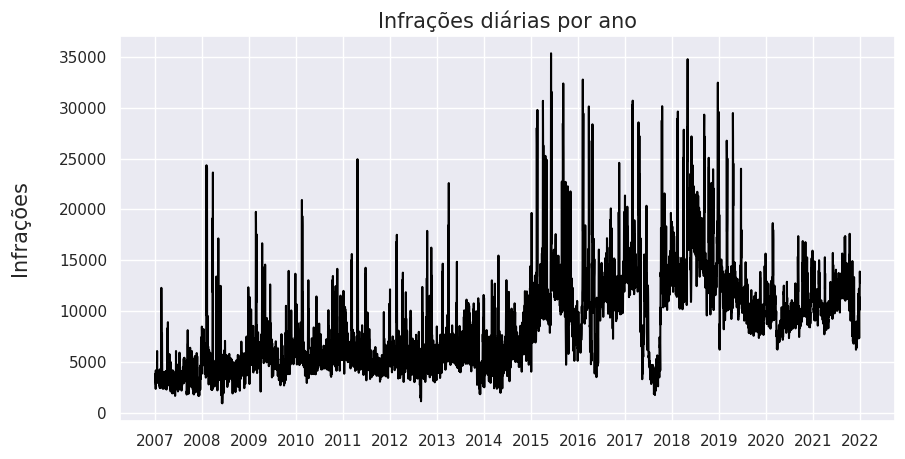

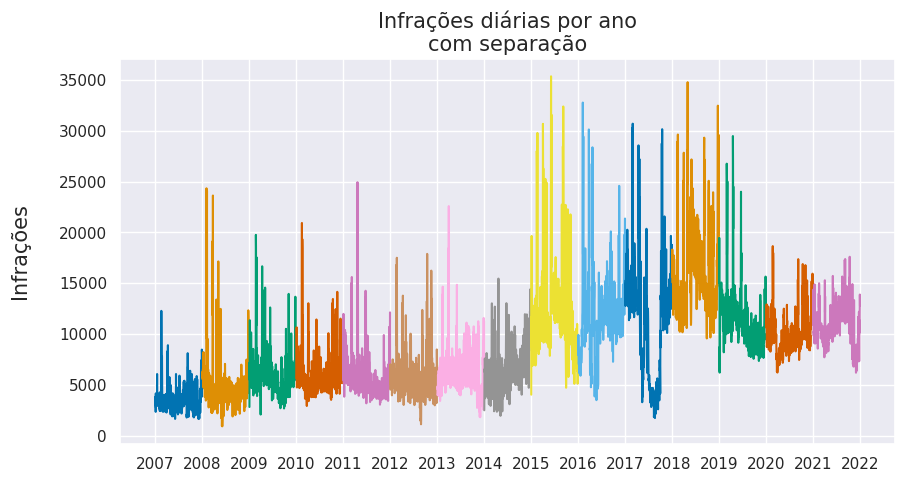

In [9]:
df_dias = df.infracoes.groupby(by=[df.dat_infracao]).sum()

sns.set(rc={'figure.figsize':(10,5)})

# Preto
fig = sns.lineplot(
    x=df_dias.index,
    y=df_dias, 
    color='black', 
    alpha=1, 
    legend=False
    )
fig.set_ylabel('Infrações\n', fontsize=fonte)
fig.set_xlabel('', fontsize=fonte) 
fig.set_title('Infrações diárias por ano', fontsize=fonteTit)
locator = mdates.YearLocator()
fig.xaxis.set_major_locator(locator)
plt.show()

# Colorido
fig = sns.lineplot(
    x=df_dias.index, 
    y=df_dias, 
    hue=df_dias.index.year, 
    palette=paleta,
    alpha=1, 
    legend=False
    )
fig.set_ylabel('Infrações\n', fontsize=fonte)
fig.set_xlabel('', fontsize=fonte) 
fig.set_title('Infrações diárias por ano\ncom separação', fontsize=fonteTit)

locator = mdates.YearLocator()
fig.xaxis.set_major_locator(locator)
plt.show()

del df_dias

### Continuação


In [10]:
del df
df = pd.read_csv(
    'csv_v2/infracoes_filt_new.csv', 
    sep=';', 
    #nrows=15000000, 
    #engine='c',
    usecols=['dat_infracao', 'uf_infracao'],
)

df.dat_infracao = pd.to_datetime(df['dat_infracao'])

In [11]:
df_ = df.groupby(by=[df.dat_infracao]).count()

In [12]:
df_2 = df_.copy()

df_2.reset_index(inplace=True)
df_2['Semana'] = df_2.reset_index()['dat_infracao'].dt.week
df_2['Ano'] = df_2.reset_index()['dat_infracao'].dt.year
df_2['Dia_Semana']  = df_2.reset_index()['dat_infracao'].dt.weekday
df_2['Dia']  = df_2.reset_index()['dat_infracao'].dt.day
df_2['Mes']  = df_2.reset_index()['dat_infracao'].dt.month

df_2.rename({'uf_infracao':'Infrações', 'Semana':'Semana'}, axis=1, inplace=True)


### Boxplots de infrações por mês, dia, semana e ano


Text(0, 0.5, 'Infrações\n')

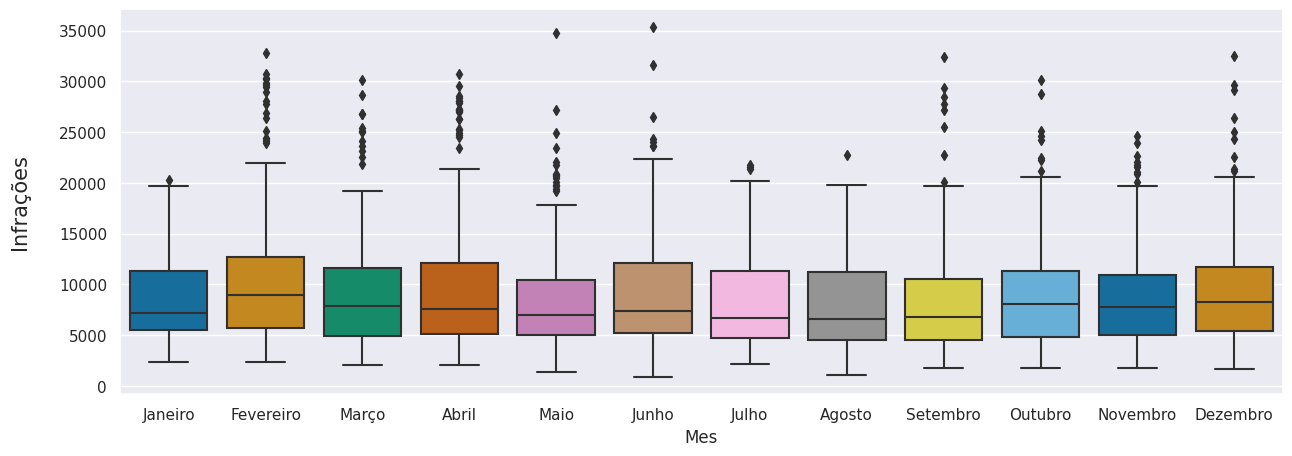

In [13]:
meses = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8: 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}

for k, v in meses.items():
    df_2.loc[df_2.Mes == k, 'Mes'] = v


sns.set(rc={'figure.figsize':(15,5)})
fig = sns.boxplot(
    x= df_2.Mes,
    y= df_2['Infrações'],
    palette=paleta
    )
#fig.set_xlabel('\nMeses do ano', fontsize=fonte)
fig.set_ylabel('Infrações\n', fontsize=fonte)

Text(0, 0.5, 'Infrações\n')

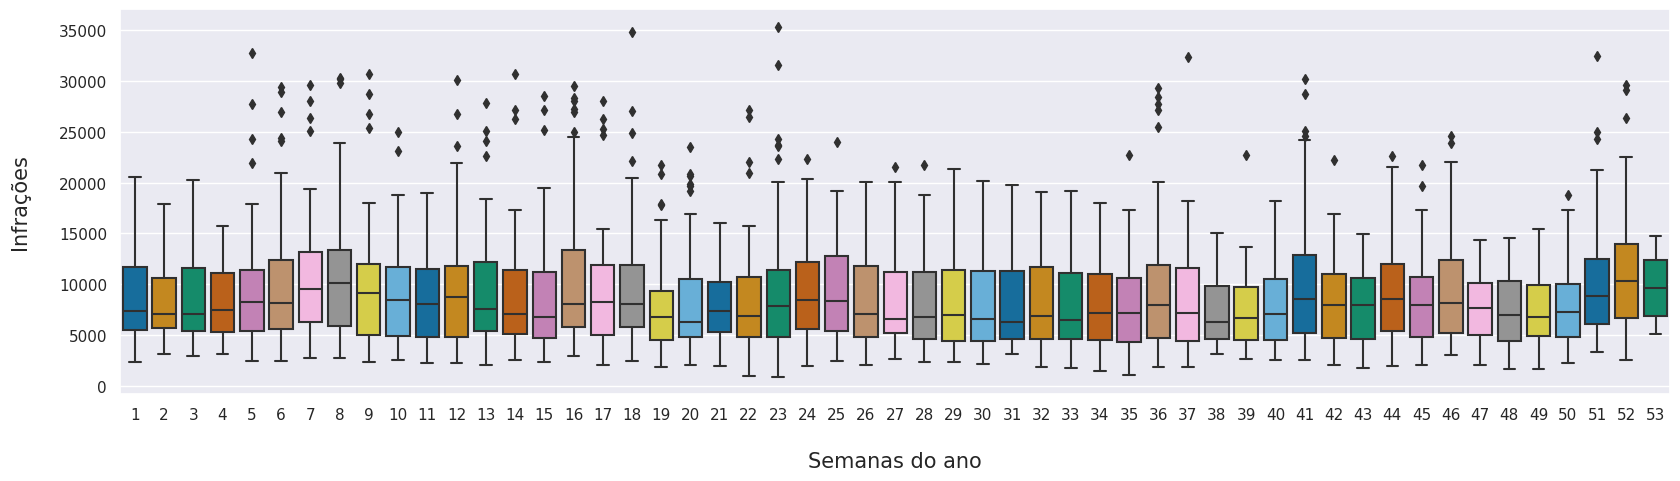

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
fig = sns.boxplot(
    x= df_2.Semana,
    y= df_2['Infrações'],
    palette=paleta,
    )
fig.set_xlabel('\nSemanas do ano', fontsize=fonte)
fig.set_ylabel('Infrações\n', fontsize=fonte)

Text(0, 0.5, 'Infrações\n')

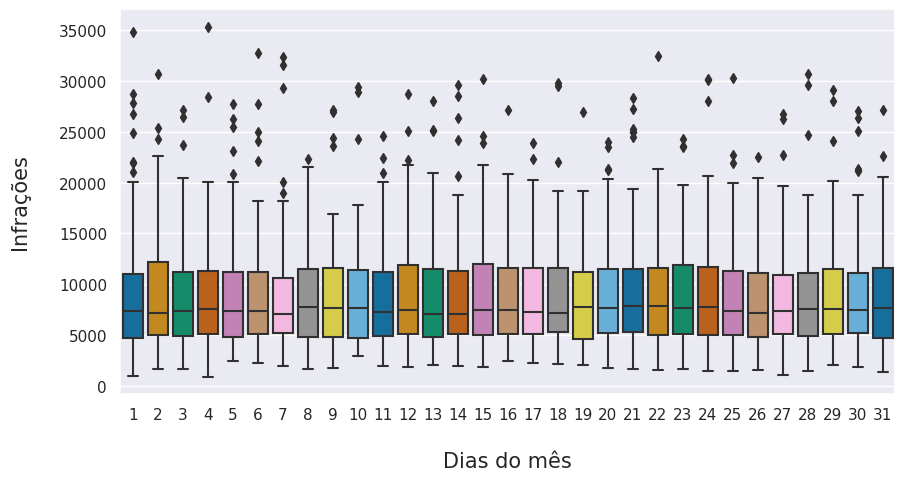

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.boxplot(
    x= df_2.Dia,
    y= df_2['Infrações'],
    palette=paleta
    )
fig.set_xlabel('\nDias do mês', fontsize=fonte)
fig.set_ylabel('Infrações\n', fontsize=fonte)

Text(0, 0.5, 'Infrações\n')

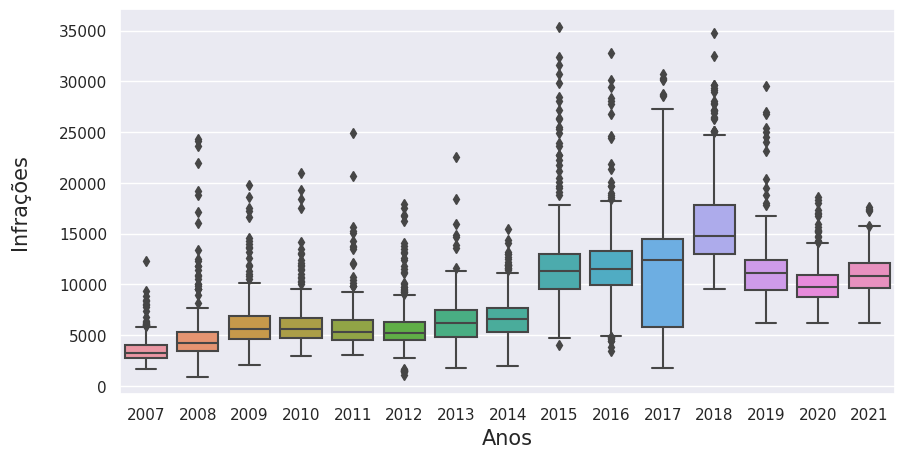

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.boxplot(
    x= df_2.Ano,
    y= df_2['Infrações']
    )
fig.set_xlabel('Anos', fontsize=fonte)
fig.set_ylabel('Infrações\n', fontsize=fonte)

### Aqui faz aquele gráfico bonito mas que tá errado

In [17]:
%%script false --no-raise-error

sns.set(rc={'figure.figsize':(16,9)})
sns.set(font_scale = 1)
#sns.set_style('greygrid')
sns.set(rc={'axes.facecolor':'black', 'grid.color':'black', 'figure.facecolor':'black'})

linha = 10

fig = sns.lineplot(x=df_2.Ano, y=df_2.Infrações, hue= df_2.Dia, marker='o',legend=False, linestyle='', dashes=False, alpha=0, markersize = linha, linewidth=linha)
sns.lineplot(x=df_2.Ano, y=df_2.Infrações, hue= df_2.Dia, dashes=False,  alpha=.2, legend=False, linewidth=linha, ax=fig)
#sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.show()


### Tem barplot mas eu não vou querer

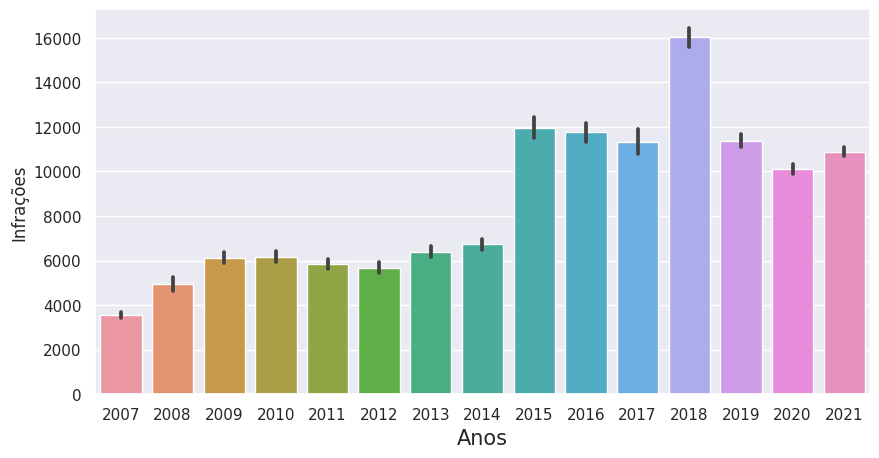

In [18]:
sns.set(rc={'figure.figsize':(10,5)})
fig = sns.barplot(
    x= df_2.dat_infracao.dt.year,
    y= df_2['Infrações']
    )
fig.set_xlabel('Anos', fontsize=fonte)
plt.show()

## MSTL

In [19]:
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult

df_['ocorrencias'] = np.log(df_.uf_infracao)
df_.drop(['uf_infracao'], axis=1, inplace = True)

### Fit e output do MSTL

In [20]:
mstl = MSTL(
    df_,
    periods=[7, 52, 365],
    windows=[101, 101, 101],
    iterate=3,
    stl_kwargs={
        'trend':1001,
        'seasonal_deg':0
    }
)
res = mstl.fit()


In [21]:
result_list = [res.observed, res.trend, res.resid, res.seasonal]
results = pd.concat(result_list, axis=1)

rename = {
    'observed':'Original',
    'trend':'Tendência',
    'seasonal_7':'Intra-semanal',
    'seasonal_52': 'Semanal',
    'seasonal_365': 'Anual',
    'resid':'Resíduo'
    }

results.rename(rename, axis=1, inplace=True)
results.reset_index(inplace=True)


data = results['dat_infracao']
observado = results['Original']
tendencia = results['Tendência']
residuo = results['Resíduo']
diario = results['Intra-semanal']
semanal = results['Semanal']
anual = results['Anual']


### Histograma dos resíduos

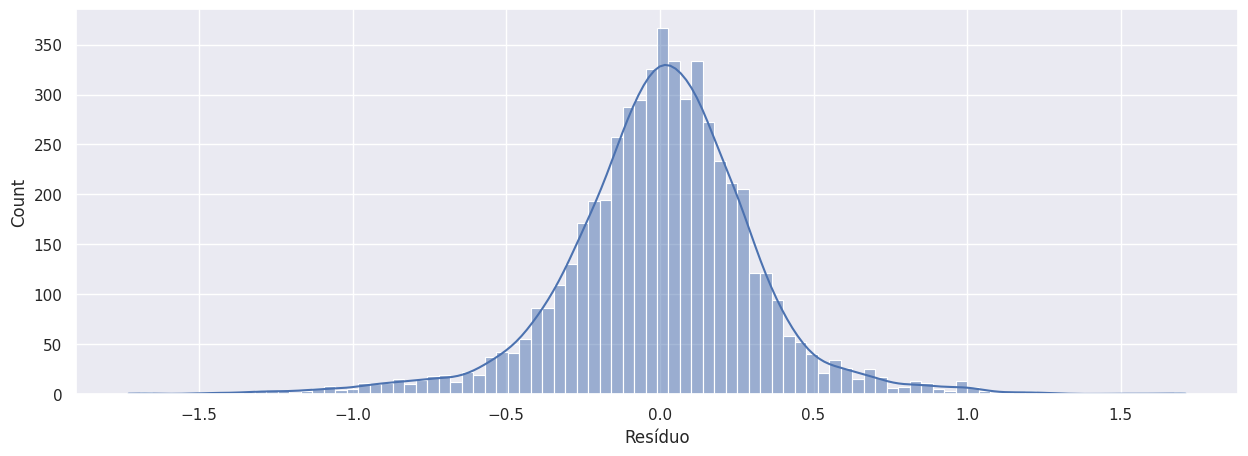

In [22]:
sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(residuo, kde=True)
plt.show()

### Os gráficos da decomposição para o relatório

Text(0.5, 0, ' ')

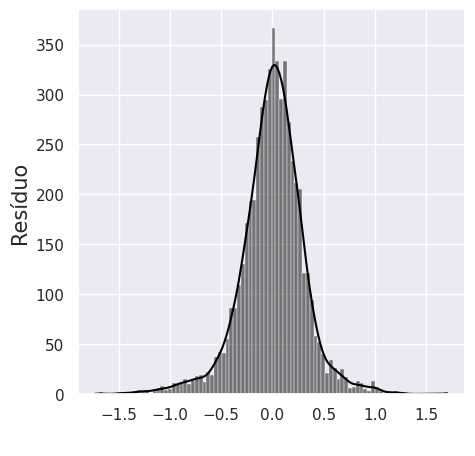

In [23]:
sns.set(rc={'figure.figsize':(5,5)})

plots = [observado, tendencia, residuo, diario, semanal, anual]

fig = sns.histplot(residuo, kde=True, alpha=0.5, color='black')
fig.set_ylabel('Resíduo', fontsize=fonte)
fig.set_xlabel(' ')

Text(0.5, 0, ' ')

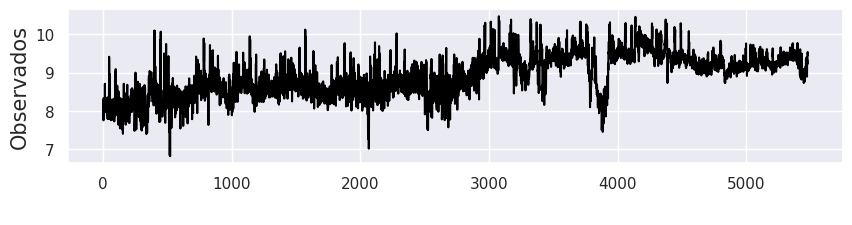

In [24]:
sns.set(rc={'figure.figsize':(10,2)})

fig = sns.lineplot(observado, alpha=1, color = 'black')
fig.set_ylabel('Observados', fontsize=fonte)
fig.set_xlabel(' ')

Text(0.5, 0, ' ')

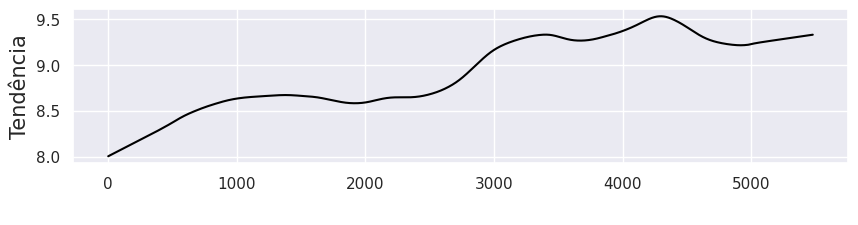

In [25]:
fig = sns.lineplot(tendencia, alpha=1, color = 'black')
fig.set_ylabel('Tendência', fontsize=fonte)
fig.set_xlabel(' ')

Text(0.5, 0, ' ')

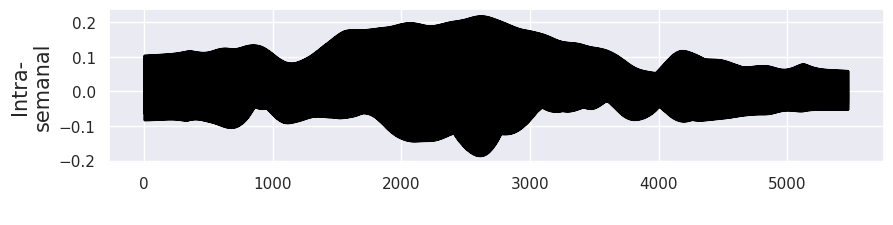

In [26]:
fig = sns.lineplot(diario, alpha=1, color = 'black')
fig.set_ylabel('Intra-\nsemanal', fontsize=fonte)
fig.set_xlabel(' ')

Text(0.5, 0, ' ')

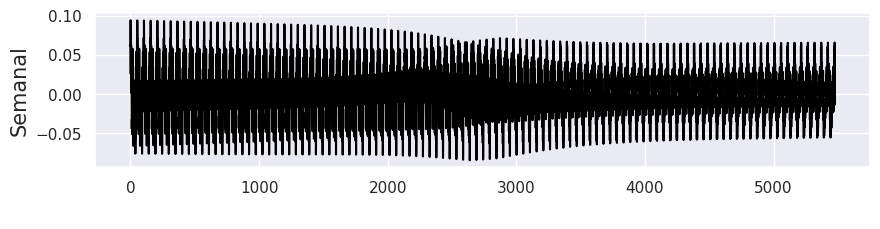

In [27]:
fig = sns.lineplot(semanal, alpha=1, color = 'black')
fig.set_ylabel('Semanal', fontsize=fonte)
fig.set_xlabel(' ')

Text(0.5, 0, ' ')

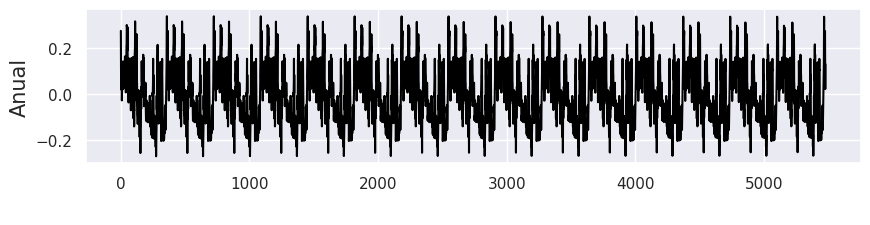

In [28]:
fig = sns.lineplot(anual, alpha=1, color = 'black')
fig.set_ylabel('Anual', fontsize=fonte)
fig.set_xlabel(' ')


### Análise dos resíduos com os outliers

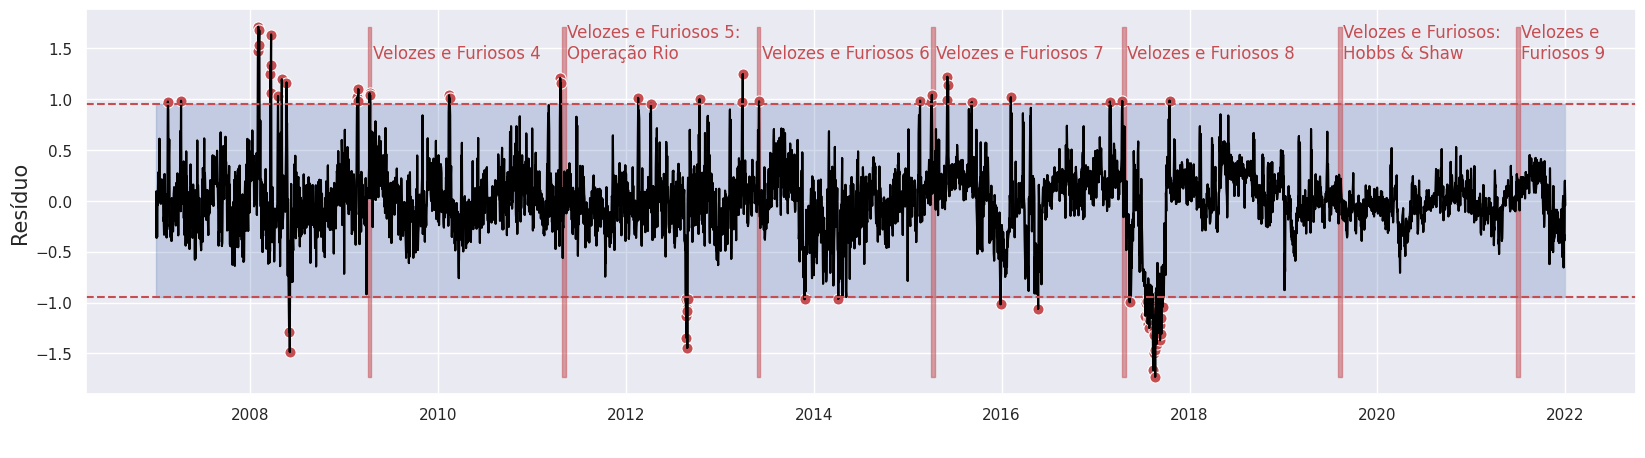

In [29]:

sns.set(rc={'figure.figsize':(20,5)})
filmes = {
    'Velozes e Furiosos 4': '2009-04-03', 
    'Velozes e Furiosos 5:\nOperação Rio': '2011-04-29', 
    'Velozes e Furiosos 6': '2013-05-24', 
    'Velozes e Furiosos 7': '2015-04-02', 
    'Velozes e Furiosos 8': '2017-04-13', 
    'Velozes e Furiosos:\nHobbs & Shaw' : '2019-08-01',
    'Velozes e \nFuriosos 9' : '2021-06-24'
    }

x = data
y = residuo

lower = results['Resíduo'].describe().loc['mean'] - 3 * results['Resíduo'].describe().loc['std']
upper = results['Resíduo'].describe().loc['mean'] + 3 * results['Resíduo'].describe().loc['std']
results_outliers = results.loc[(results['Resíduo'] <= lower) | (results['Resíduo'] >= upper)]

#outliers = result_window.loc[result_window['dat_infracao'].isin(results_outliers.dat_infracao)]

x_outliers = results_outliers['dat_infracao']
y_outliers = results_outliers['Resíduo']

fig = sns.lineplot(
    x = x_outliers,
    y = y_outliers,
    marker = 'o',
    linestyle = '',
    dashes = False,
    alpha = 1,
    markersize = 8, 
    color = 'r'
    )

fig.set_ylabel('Resíduo', fontsize=fonte)
fig.set_xlabel(' ', fontsize=fonte)

sns.lineplot(
    x = x, 
    y = y, 
    color='black', 
    ax=fig
    )

plt.plot(x,y,color='black')
#plt.xticks(range(2008,2022))
plt.fill_between(
    [pd.Timestamp(data.min()), pd.Timestamp(data.max())], 
    lower, 
    upper, 
    color='b', 
    alpha=0.25
    )
plt.axhline(
    lower, 
    color='r',
    linestyle='dashed')
plt.axhline(
    upper, 
    color='r',
    linestyle='dashed',
    alpha=1)

#plt.text(x=pd.Timestamp('2021-06-01'), y=lower-0.2, s='-3 desvios', color='r')
#plt.text(x=pd.Timestamp('2021-06-01'), y=upper+0.1, s='+3 desvios', color='r')

for filme, lanc in filmes.items():
#    plt.axvline(pd.Timestamp(lanc), color='r')
    plt.text(pd.Timestamp(lanc) + pd.DateOffset(days=20),1.4,s=filme, rotation=0, color='r')
    plt.fill_between(
        [pd.Timestamp(lanc), pd.Timestamp(lanc) + pd.DateOffset(days=14)],
        residuo.min(),
        residuo.max(),
        color='r',
        alpha=0.50,
    )


plt.show()

### Analisando cada filme em uma janela de 21 dias antes e 21 dias depois da estréia

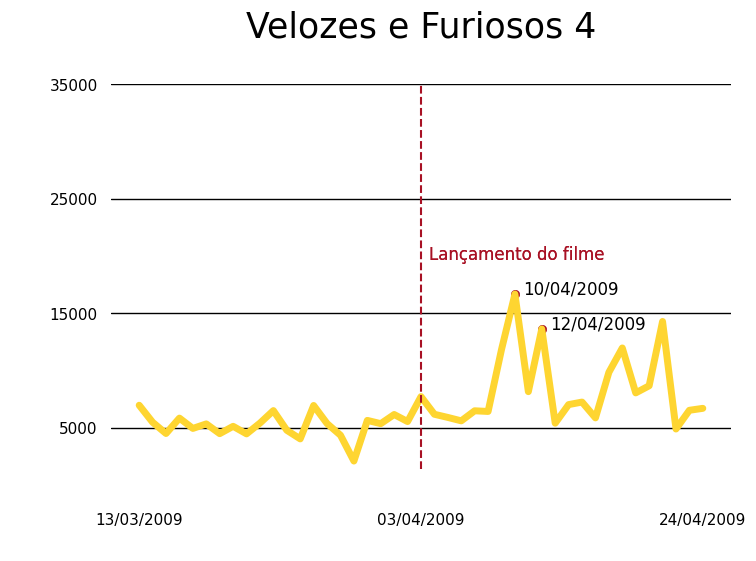

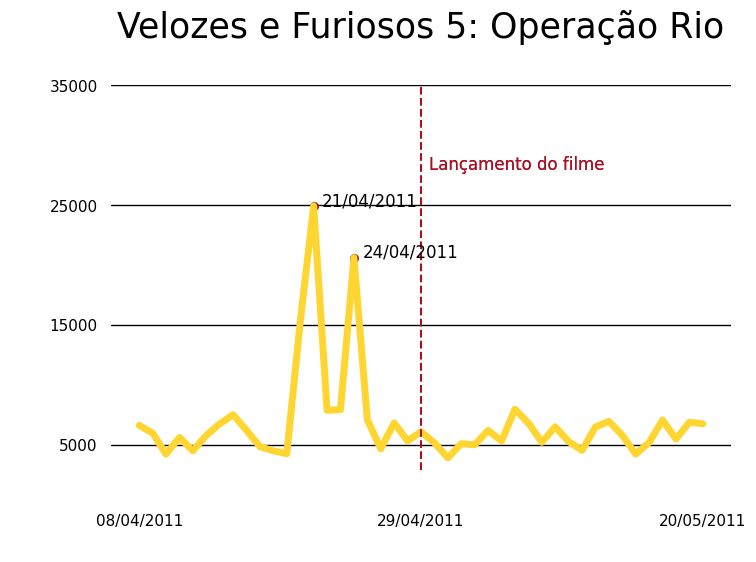

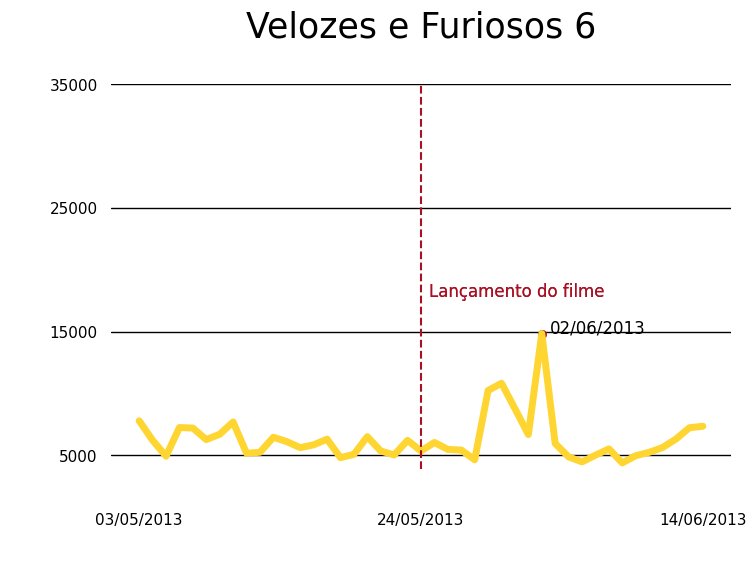

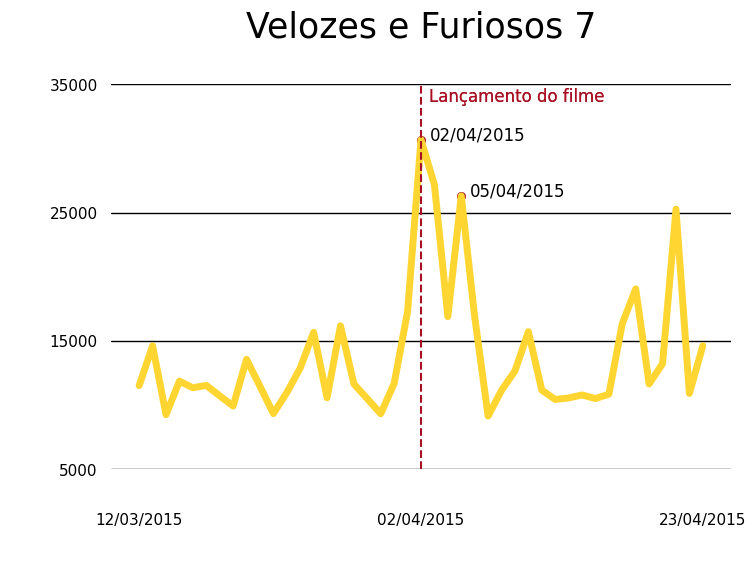

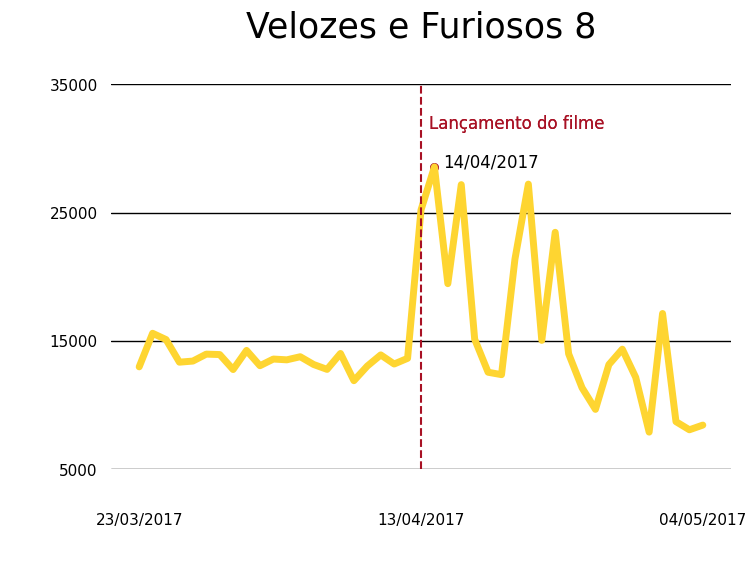

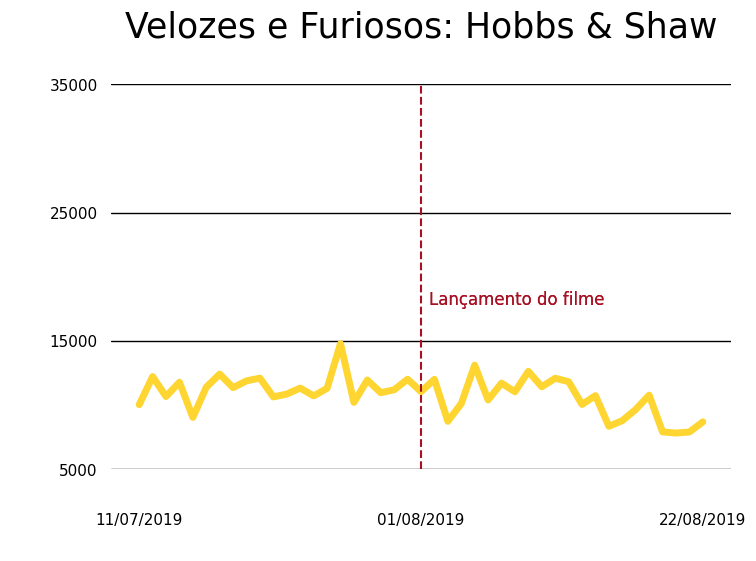

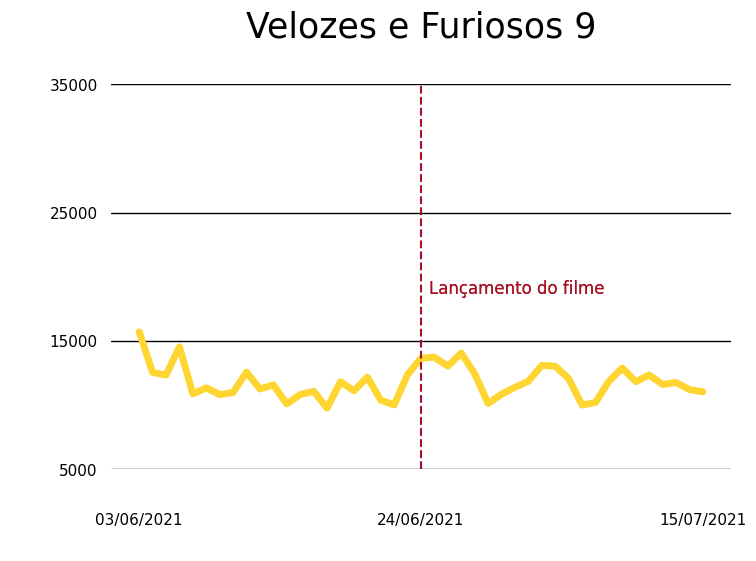

In [36]:
fonte = 25
fonteTit = 25

sns.set(rc={})
sns.set(rc={
    'figure.figsize':(8,5),
    'axes.facecolor': (0, 0, 0, 0), 
    'figure.facecolor':(0, 0, 0, 0),
    'grid.color':'#000', 
    'xtick.color': '#000',
    'ytick.color': '#000',
    })

plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.pad'] = 25

filmes = {
    'Velozes e Furiosos 4': '2009-04-03', 
    'Velozes e Furiosos 5: Operação Rio': '2011-04-29', 
    'Velozes e Furiosos 6': '2013-05-24', 
    'Velozes e Furiosos 7': '2015-04-02', 
    'Velozes e Furiosos 8': '2017-04-13', 
    'Velozes e Furiosos: Hobbs & Shaw' : '2019-08-01',
    'Velozes e Furiosos 9' : '2021-06-24'
    }


for filme, lanc in filmes.items():

    data222 = pd.Timestamp(lanc,)
    dt_inic = data222 - pd.DateOffset(days=21)
    dt_fina = data222 + pd.DateOffset(days=21)
    result_window = df_2.loc[df_2.dat_infracao.between(dt_inic, dt_fina)]
    x_window = result_window['dat_infracao']
    y_window = result_window['Infrações']
    
    outliers = result_window.loc[result_window['dat_infracao'].isin(results_outliers.dat_infracao)]
    x_outliers = outliers['dat_infracao']
    y_outliers = outliers['Infrações']

    fig = sns.lineplot(x = x_window, y = y_window, color=amarelo, linewidth=5)
    sns.scatterplot(x=x_outliers, y=y_outliers, color=vermelho, edgecolor=None, sizes=110, ax=fig)

    fig.grid(axis='x')
    
    fig.set_title(filme+'\n',fontsize=fonteTit, color='#000')
    fig.set_xlabel(' ')
    fig.set_ylabel(' ', fontsize=fonte, color='#000')


    #plt.plot(x_window,y_window,color=amarelo)

    plt.axvline(data222, color=vermelho,linestyle='dashed')

    plt.yticks([5000, 15000, 25000, 35000])
    plt.xticks(
        [dt_inic, data222, dt_fina], 
        [dt_inic.strftime('%d/%m/%Y'), data222.strftime('%d/%m/%Y'), dt_fina.strftime('%d/%m/%Y')]
    )

    plt.text(
        data222+ pd.DateOffset(hours=15),
        y_window.max() + 3000,
        s='Lançamento do filme', 
        rotation=0, 
        color=vermelho
        )

    plt.text(
        data222+ pd.DateOffset(hours=15),
        y_window.max() + 3000,
        s='Lançamento do filme', 
        rotation=0, 
        color=vermelho
        )
    
    for i in outliers.iloc:
        dd = i[0]
        infs = i[1]
        ddd = dd.strftime('%d/%m/%Y')
        plt.text(
            dd + pd.DateOffset(hours=15),
            infs,
            s=ddd, 
            rotation=0,
            color='#000'
            )
    plt.show()

In [33]:
as

SyntaxError: invalid syntax (1239779345.py, line 1)

## Análise de Autocorrelação da Série Temporal

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

sns.set(rc={'figure.figsize':(5,5)})

filmes = {
    'Fast 4': '2009-04-03', 
    'Fast 5': '2011-04-29', 
    'Fast 6': '2013-05-24', 
    'Fast 7': '2015-04-02', 
    'Fast 8': '2017-04-13', 
    'Fast 9': '2021-06-24'
    }

lag_ = len(res.resid)/7
plot_acf(res.resid, lags=lag_)
#acf_ = acf(residuo, nlags=2000)
#fig = sns.lineplot(acf_)


plt.xlabel('Lag', fontsize=fonte)
plt.ylabel('ACF', fontsize=fonte)
plt.title('', fontsize=fonteTit)
plt.ylim([-0.2, 1.1])

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(res.resid, lags = 15, method = "ols")
plt.ylim([-0.1, 1.1])

## Calculando os momentos para o relatório

In [ ]:
from scipy.stats import moment


print('Média'.ljust(13), moment(res.resid, moment=1))

print('Variância'.ljust(13), moment(res.resid, moment=2))

print('Assimetria'.ljust(13),moment(res.resid, moment=3))

print('Curtose'.ljust(13),moment(res.resid, moment=4))



In [ ]:
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(5,5)})
pontos = np.random.normal(0,1,2000)
sm.qqplot(res.resid, line ='45')
sm.qqplot(np.exp(res.resid), line ='45')
sm.qqplot(pontos, line ='45')

## Tentativa frustrada de usar o ggplot

#### Plotline (ggplot)

In [ ]:
%%script false --no-raise-error

import plotnine
from plotnine import ggplot, aes

filmes = {
    'Fast 4': '2009-04-03', 
    'Fast 5': '2011-04-29', 
    'Fast 6': '2013-05-24', 
    'Fast 7': '2015-04-02', 
    'Fast 8': '2017-04-13', 
    'Fast 9': '2021-06-24'
    }

filme = list(filmes.keys())
ano = list(filmes.values())

plotnine.options.figure_size = (15,5)


ggpl_line = ggplot(data=results, mapping=aes(x='dat_infracao', y='Resíduo'))
lineplot = (ggpl_line + 
plotnine.geom_line(color='black') + 
plotnine.labs(title='Resíduos')
# + plotnine.annotate('text', x=pd.Timestamp(ano[0]), y=4235, label=filme[0], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[1]), y=4235, label=filme[1], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[2]), y=4235, label=filme[2], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[3]), y=4235, label=filme[3], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[4]), y=4235, label=filme[4], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[5]), y=4235, label=filme[5], color='red')
).draw()

residuo_ = pd.DataFrame()
residuo_['Resíduo'] = (residuo - residuo.describe().mean() )/ residuo.describe().std()
residuo_.describe()

ggpl_hist = ggplot(residuo_, mapping=aes(x='Resíduo'))

histplot = (ggpl_hist 
            + plotnine.geom_histogram(fill='pink') 
            + plotnine.geom_density(alpha = 0.25)
            ).draw()



ggpl_line = ggplot(data=resuacf_lts, mapping=aes(x='dat_infracao', y='Resíduo'))
lineplot = (ggpl_line + 
plotnine.geom_line(color='black') + 
plotnine.labs(title='Resíduos')
# + plotnine.annotate('text', x=pd.Timestamp(ano[0]), y=4235, label=filme[0], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[1]), y=4235, label=filme[1], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[2]), y=4235, label=filme[2], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[3]), y=4235, label=filme[3], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[4]), y=4235, label=filme[4], color='red') +
#plotnine.annotate('text', x=pd.Timestamp(ano[5]), y=4235, label=filme[5], color='red')
).draw()